# Notebook 2 - Regresión Lineal

En esta lección intentamos predecir el precio de las viviendas del **Dataset Boston Housing** usnado la tecnica de [regresión lineal](https://es.wikipedia.org/wiki/Regresión_lineal).

In [0]:
# Importamos la librería SKLearn, que trae bastantes funcionalidades de Machine
# Learning. Esta librería también incluye algunos datasets muy conocidos como por
# ejemplo el que vamos a utilizar hoy: El Boston Housing Dataset.
import sklearn as skl
# Importamos los el dataset Boston Housing
from sklearn.datasets import load_boston

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [43]:
# Los datos cargados desde la librería Sklearn contienen una descripción del
# dataset que estamos cargando, almacenado en el atributo DESCR.

boston_dataset = load_boston()

print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

# Guardamos información de las dimensiones de nuestro dataset. Recuerda: 
# n = número de ejemplos que tenemos de nuestros datos y
# p = número de características que tenemos de cada datos.

n, p = X.shape

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1. Análisis exploratorio inicial.

Como vimos en la descripción anterior, en dataset contiene muchas variables.
Nos centraremos en modelar la relación existente entre las variables **RM** (Número medio de habitaciones) y **MEDV** (Valor medio de la vivienda). Como debe de ser ya costumbre, vamos a primero comenzar entendiendo la naturaleza de nuestros datos, realizando un análisis exploratorio preliminar. Recuerda, aquí hacemos uso de las herramientas estadísticas y matemáticas aprendidas para obtener una mejor imagen de lo que nuestros datos representan. La pregunta aquí es... ¿Qué preguntas quieres responder con estas herramientas?

1.  **¿Existe algún relación entre la variable RM y MEDV?** 
En el siguiente gráfico podemos ver una tendencía a según el número medio de habitaciones aumenta, también lo hace el precio.
Y es que existe una correlación de más del 60% entre las 2 variables.

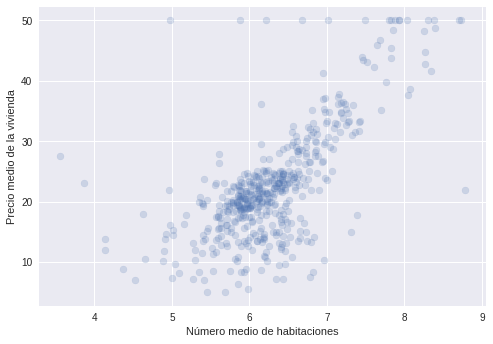

Existe una correlación de 69.53599470715392 %


In [44]:
RM = X[:,5]

plt.xlabel("Número medio de habitaciones")
plt.ylabel("Precio medio de la vivienda")
plt.scatter(RM, Y, alpha=0.2)
plt.show()

print('Existe una correlación de', np.corrcoef(RM, Y)[0,1] * 100.0, '%')

2.   **¿Cúal es el precio medio de las viviendas cuyo número medio de habitaciones oscila entre 5 y 6?** 

In [45]:
print('Precio medio de las viviendas de entre 5 y 6 habitaciones: ' + str(np.mean(Y[(RM > 5) & (RM < 6)])))
# print(np.mean(Y[np.logical_and(RM > 5, RM < 6)])) # another way


Precio medio de las viviendas de entre 5 y 6 habitaciones: 17.551592356687898


3. **¿Identificas algún fenómeno anómalo en la distribución de los datos?** 
La mayoria de casas tienen un precio de 20, mientras que hay unas pocas que se disparán por encima de 30. Además es raro que haya casos donde no haya ninguna casa y que para 50 existan bastantes. Lo más probable es que estos datos se hayan truncado debido a que el precio se dispara, dificultando en muchas ocasiones aplicar tecnicas de ML.

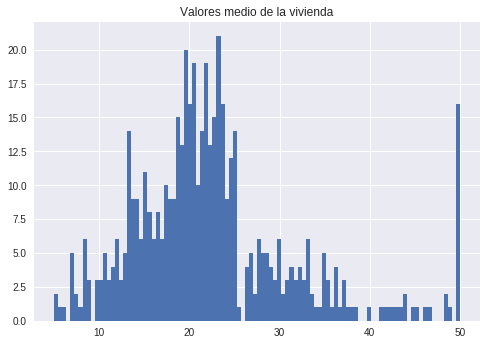

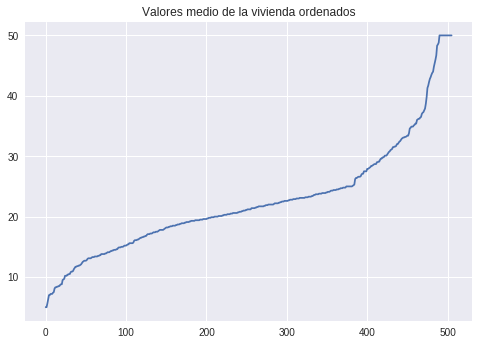

In [46]:
plt.title("Valores medio de la vivienda")
plt.hist(Y, bins=100)
plt.show()

plt.title("Valores medio de la vivienda ordenados")
plt.plot(np.sort(Y))
plt.show()



## 2. Regresión Lineal Simple - Mínimos Cuadrados Ordinarios.

Una vez hemos efectuado el análisis exploratorio inicial, vamos a proceder a implementar y entrenar a nuestro modelo. Recuerda que podemos conseguir ajustar a los datos nuestra recta de regresión lineal haciendo uso de aquellos valores de los parámetros obtenidos mediante el método de ***Mínimos Cuadrados Ordinarios***. Este método encuentra que el mínimo de la función del ***Error Cuadrático Medio*** se encuentra en el punto donde su derivada es igual a 0. Esto se obtiene evaluando la siguiente expresión:

> > > > >  > > > $W = (X^TX)^{-1}X^TY$

Recuerda que para trabajar de forma vectorizada, ampliamos la matriz $X$ con una primera columna de valores asignados a $1$, que servirán para mantener al termino independiente pues... pues eso: independiente.

---


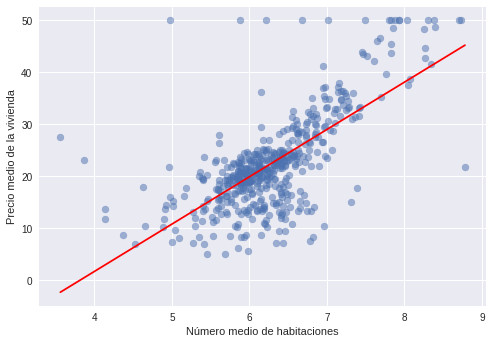

In [47]:
# Este método obtiene la matriz W necesaria para la regresión
def get_W(row, y):
  X = np.matrix([np.ones(len(row)), row]).T

  inverse = np.linalg.inv(X.T @ X)
  
  return inverse @ X.T @ y

#Hace la predicción de la regresión lineal, el W x [1, Valores]
def predict(value, w):
  if isinstance(value, list) or isinstance(value, np.ndarray):
    return np.ravel(w @ np.matrix([np.ones(len(value)), value]))
  else:
    return (w @ [[1],[value]])[0,0]

  
  

W = get_W(RM, Y)

plt.xlabel("Número medio de habitaciones")
plt.ylabel("Precio medio de la vivienda")
plt.scatter(RM, Y, alpha=0.5)
plt.plot([np.min(RM), np.max(RM)], predict([np.min(RM), np.max(RM)], W), c='red')
plt.show()




El modelo de Regresión Lineal mediante el método de Mínimos Cuadrados Ordinarios nos permite obtener una matriz W que contiene los parámetros de la recta **w0** y **w1**

La ecuación de una línea es

*y = w1 x + w0*


Donde **w1** es la pendiente de la recta, lo inclinada que esta, siendo positiva si es creciente y negativa si es decreciente.

**w0** es el valor y que toma la recta al cruzar por el eje vertical, y permite a la recta moverse verticalmente.

In [48]:
#@Prueba la regresión
rooms_amount = 9 #@param {type:"slider", min:0, max:10, step:1}
rooms_price = 10094 #@param {type:"slider", min:0, max:50000, step:1}
print("Valor medio de la vivienda de", rooms_amount,"habitaciones: ", predict(rooms_amount, W))
print("Número de habitaciones medio cuyo valor medio es de", rooms_price,"$ es ", (rooms_price/1000.0 - W[0, 0] ) / W[0, 1])

Valor medio de la vivienda de 9 habitaciones:  47.24836005418345
Número de habitaciones medio cuyo valor medio es de 10094 $ es  4.918049308022417


El error cuadratico medio de la regresión es

In [49]:
print("ECM: ", np.mean( ( predict(RM, W) - Y )**2));

ECM:  43.60055177116956


## 3. Regresión Lineal Simple - Librería Sklearn.


Hasta este punto hemos aprendido a nivel teórico y práctico cómo funciona el modelo de ***Regresión Lineal Simple*** y cómo se implementa internamente. Esto está muy bien para tener un mejor conocimiento de la materia. Sin embargo, en el día a día tenemos que ser efectivos, y para eso lo habitual será utilizar librerías que ya implementen los modelos que vamos conociendo. Por ejemplo, la librería ***Sklearn*** ya implementa muchos de los modelos de Machine Learning que vamos a aprender durante el curso, como por ejemplo, el modelo de Regresión Lineal. 


Precio medio de viviendas de 9 habitaciones  47.24836005418422
ECM  43.60055177116956


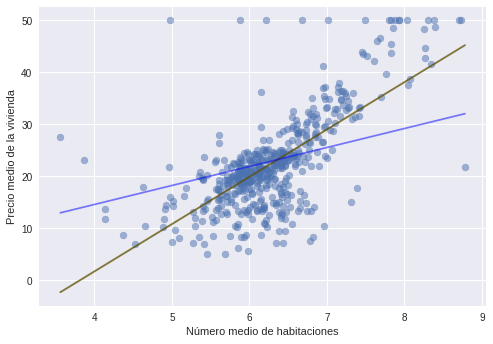

In [50]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regression = linear_model.LinearRegression()
regression.fit(RM[:, np.newaxis], Y[:, np.newaxis])

print("Precio medio de viviendas de 9 habitaciones ", regression.predict([[9]])[0][0] )
print("ECM ", mean_squared_error(regression.predict(RM[:, np.newaxis]), Y[:, np.newaxis]))

regression2 = linear_model.LinearRegression(fit_intercept=False)
regression2.fit(RM[:, np.newaxis], Y[:, np.newaxis])

plt.xlabel("Número medio de habitaciones")
plt.ylabel("Precio medio de la vivienda")
plt.scatter(RM, Y, alpha=0.5)

plt.plot([np.min(RM), np.max(RM)], predict([np.min(RM), np.max(RM)], W), c='red', alpha=0.5)
plt.plot([np.min(RM), np.max(RM)], regression.predict([[np.min(RM)], [np.max(RM)]]), c='green', alpha=0.5)
plt.plot([np.min(RM), np.max(RM)], regression2.predict([[np.min(RM)], [np.max(RM)]]), c='blue', alpha=0.5)

plt.show()

# Con fit_inetrcept 0 w0 debe ser 0

## 4. Regresión Lineal Múltiple.

Por último, como ya hemos visto, podemos generalizar el modelo de Regresión Lineal Simple añadiendo más variables y obteniendo así el model de Regresión Lineal Múltiple. Al añadir más variables al modelo, le estamos dotando de más información que ayude a mejorar las predicciones. Por ejemplo, un modelo de Regresión Lineal Simple podría intentar predecir la altura de una persona en base al tamaño de la mano. Pero si añadieramos otra variable, como por ejemplo, el género, podríamos tener más información para hacer predicciones más fidedignas.

La buena noticia es que a nivel de código, no hay gran diferencia entre ambos modelos, que también pueden ser resueltos mediante el método de ***Mínimos Cuadrados Ordinarios*** evaluando la expresión que ya conocemos:

> > > > >  > > > $W = (X^TX)^{-1}X^TY$

---
** Tu tarea: ** 

1. Realiza un modelo de Regresión Lineal Múltiple dónde se utilizen las variables ** RM** (Número medio de habitaciones), **LSTAT ** (Porcentaje de población en el barrio clasificada como clase baja) y **PTRATIO** (Ratio de alumno-profesor del barrio).

2. Observa el valor de los coeficientes e interprétalos.

3. Utiliza el modelo de Regresión Lineal implementado por la librería **Sklearn** para entrenar este mismo modelo y comprobar que los coeficientes que has obtenidos son correctos.

4. Evalua el modelo utilizando la función  ***sklearn.metrics.mean_squared_error()***.  y compara el valor del error obtenido en el ejercicio 2 con el Modelo de Regresión Lineal Simple. ¿El error es mayor o menor? ¿Por qué ocurre esto?


**Hint**  Puedes reutilizar mucho del código de los ejercicios anteriores.

In [51]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# COMIENZA TU CÓDIGO AQUÍ #


# W @ np.matrix([np.ones(len(RM)), RM])

RM2 = np.array(X[:,5:6])
LSTAT = X[:,10:11]
PTRATIO = X[:,12:13]

#Calculo de W2
params_mat = np.hstack((np.ones(RM2.shape), RM2, LSTAT, PTRATIO))
W2 = np.linalg.inv(params_mat.T @ params_mat) @ params_mat.T @ Y

print("CdeCoeficientes", W2)


CdeCoeficientes [18.56711151  4.51542094 -0.93072256 -0.57180569]



* El primer parametro es w0, que nos muestra que una vivienda con todos los parámetros a 0 valdría 18500 dolares
* El coeficiente w1 es el número medio de habitaciones. Es el valor más alto indicandonos que es el que más afecta al precio
* El coeficiente w2 es el porcentaje de población de clase baja, negativo porque cuanto mayor es la pobalción, menor es el precio de la vivienda
* El coeficiente w3 muestra el ratio alumno profesor, es la más cercana a 0 y la menos importante.


In [53]:

Y2predict = W2 @ params_mat.T

regression3 = linear_model.LinearRegression()
regression3.fit( np.hstack((RM2, LSTAT, PTRATIO)), Y[:, np.newaxis])

print("CdeCoeficientes de Sklearn (sin w0)", regression3.coef_)
print("CdeCoeficientes de Sklearn (w0)", regression3.intercept_)


Y2predictSk = regression3.predict( np.hstack((RM2, LSTAT, PTRATIO)))

print("Predicciones:\n", np.hstack((Y2predict.reshape(506,1), Y2predictSk)))

print("ECM: ", mean_squared_error( Y[:, np.newaxis], Y2predict))

CdeCoeficientes de Sklearn (sin w0) [[ 4.51542094 -0.93072256 -0.57180569]]
CdeCoeficientes de Sklearn (w0) [18.56711151]
Predicciones:
 [[31.16835679 31.16835679]
 [25.76746391 25.76746391]
 [32.13917258 32.13917258]
 ...
 [27.29653027 27.29653027]
 [25.99440688 25.99440688]
 [21.74409732 21.74409732]]
ECM:  27.13040575849706
